In [2]:
from flame import Machine
from flame_utils import ModelFlame, BeamState, inspect_lattice

In [3]:
latfile = 'ReA3_LEBT_highacc.lat'

In [4]:
with open(latfile, 'rb') as f:
    m = Machine(f)

In [5]:
fm = ModelFlame()

ERROR: 2020-09-10 22:05:54,460: flame_utils.core.model: invalid file: None


In [6]:
bs = BeamState(machine=m)

In [7]:
fm.bmstate = bs
fm.machine = m

In [11]:
m.conf()

OrderedDict([('AMU', 931494320.0),
             ('BaryCenter0', array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.])),
             ('HdipoleFitMode', '1'),
             ('IonChargeStates', array([ 0.4])),
             ('IonEk', 12000.0),
             ('IonEs', 931494320.0),
             ('NCharge', array([ 1000.])),
             ('S0',
              array([  3.87437615e+00,   6.01625084e-03,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   6.01625084e-03,   3.51528269e-05,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   3.87437615e+00,   6.01625084e-03,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   6.01625084e-03,
                       3.51528269e-05,   0.00000000e+00,   0.00000000e+

In [16]:
m.conf(0).keys()

odict_keys(['AMU', 'BaryCenter0', 'HdipoleFitMode', 'IonChargeStates', 'IonEk', 'IonEs', 'NCharge', 'S0', 'matrix_variable', 'n', 'name', 'sim_type', 'type', 'vector_variable'])

In [19]:
print(m.conf(0)['IonEk'])

12000.0


In [8]:
# setup observers and run flame model
#obs = fm.get_index_by_type(type='bpm')['bpm']
#obs = fm.get_index_by_type(type='marker')['marker']
obs = range(len(fm.machine))
r,s = fm.run(monitor=obs)

# get data of interest from running results
data = fm.collect_data(r, pos=True, x0_env=True, x0_rms=True, y0_env=True, y0_rms=True, ref_IonEk=True)

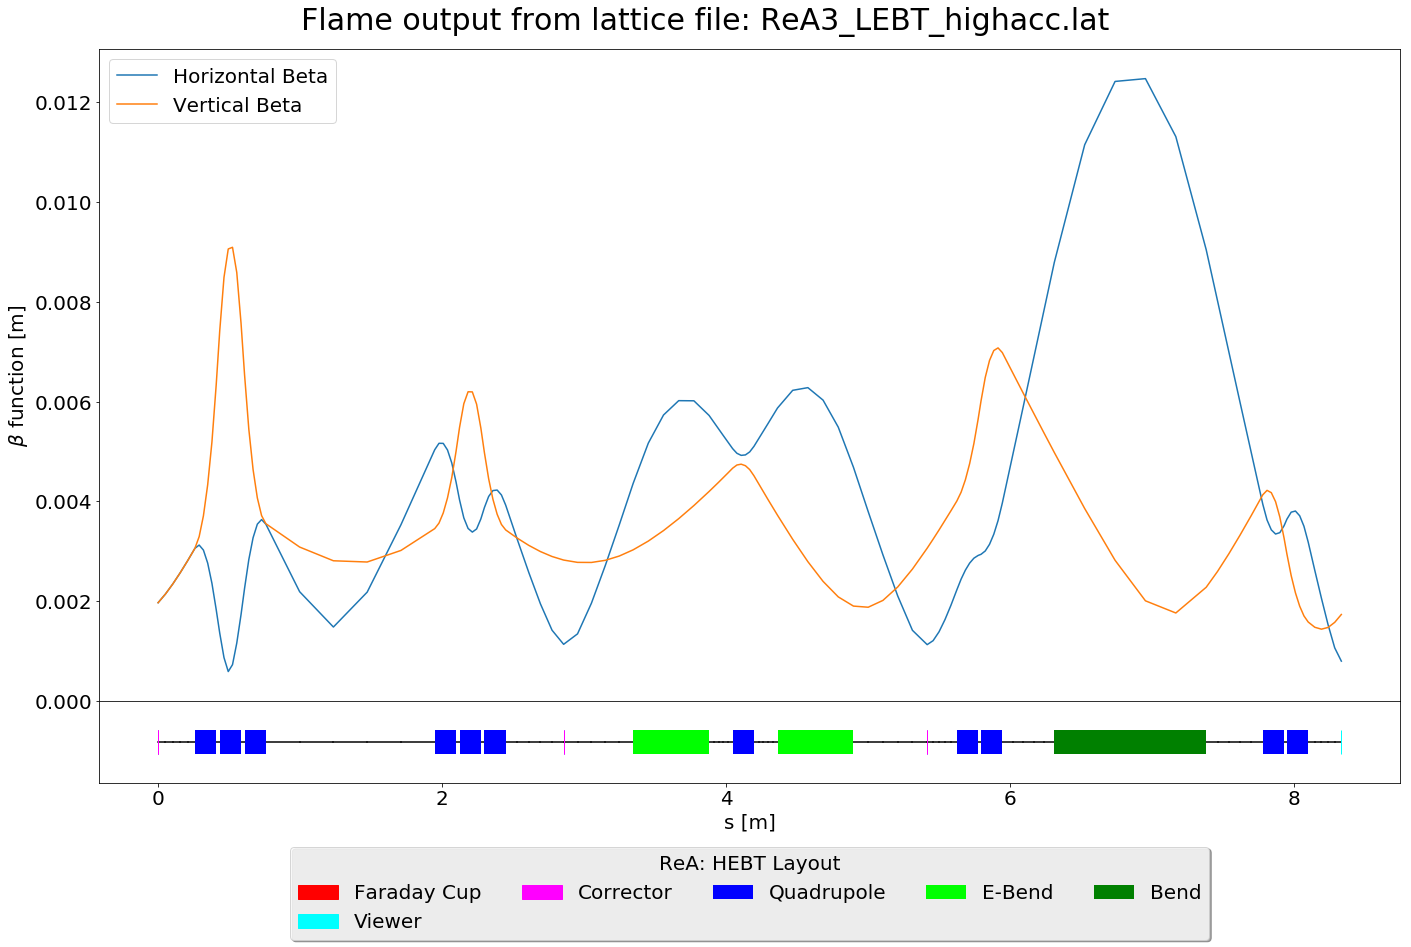

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

# Create, and show plot of beam envelope
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [20,12]
fig,(ax1,ax2)=plt.subplots(2, 1,gridspec_kw = {'height_ratios':[8,1]}, sharex=True)
fig.suptitle('Flame output from lattice file: ' + latfile, fontsize=30)

ax2,xmin,xmax,ymin,ymax = labframePlotFun.labframePlot(latfile, ax2, 0)
ax2.set_ylim([-1.0,1.0])
plt.setp(ax2, yticks=[])

ax1.plot(data['pos'], data['x0_rms']/1000.0, label='Horizontal Beta')
ax1.plot(data['pos'], data['y0_rms']/1000.0, label='Vertical Beta')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function [m]')
ax1.legend(loc='best')

fig.tight_layout(rect=(0,0,1,0.96))
plt.subplots_adjust(hspace=0.0)
plt.show()

In [10]:
m.conf()

OrderedDict([('AMU', 931494320.0),
             ('BaryCenter0', array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.])),
             ('HdipoleFitMode', '1'),
             ('IonChargeStates', array([ 0.4])),
             ('IonEk', 12000.0),
             ('IonEs', 931494320.0),
             ('NCharge', array([ 1000.])),
             ('S0',
              array([  3.87437615e+00,   6.01625084e-03,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   6.01625084e-03,   3.51528269e-05,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   3.87437615e+00,   6.01625084e-03,
                       0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   6.01625084e-03,
                       3.51528269e-05,   0.00000000e+00,   0.00000000e+